# A Simple Movie Recommender System from a Dataset of Movies watched by Users

### 1. Content-Based Recommender
### 2. Collaborative Filtering (CF) - Memory-Based CF and Model-Based Collaborative filtering

In [5]:
#Import libraries for analysing datase
import numpy as np
import pandas as pd

In [6]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [8]:
#Let's first read the movie rating data per user
df = pd.read_csv('u.data',sep = '\t' ,names = column_names)

In [29]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [3]:
#Read the movie catalogue
movie_titles = pd.read_csv('Movie_Id_Titles')

In [31]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [25]:
#Join the two dataframes
df = pd.merge(df, movie_titles, on = 'item_id')

In [32]:
df.head( )

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
%matplotlib inline

In [35]:
sns.set_style('white')

In [47]:
#This groups the ratings for each movie , calculates the average rating per movie and sort the values from highest rated movies. 
df.groupby('title')['rating'].mean( ).sort_values(ascending = False).head( )

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [49]:
#Shows the movie with the highest viewership and are rated by users. 
df.groupby('title')['rating'].count( ).sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [52]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean( ))

In [53]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [54]:
ratings['Num of Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count( ))

In [55]:
ratings.head( )

,rating,Num of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


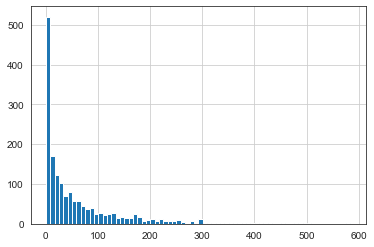

In [66]:
ratings['Num of Ratings'].hist(bins = 70)
#Here, we plot the number of ratings for each movie against the count of movies with that 'num of ratings'. 
#We see that the higher the number of user ratings, the fewer the number of movies with that rating. 

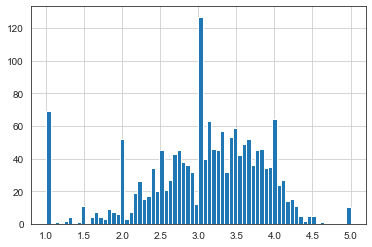

In [63]:
ratings['rating'].hist(bins=70)
#The average rating for each movie and the number of titles with that rating

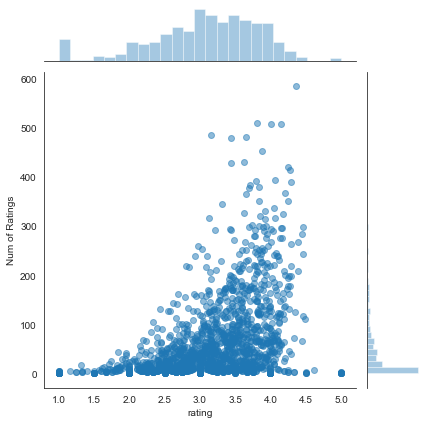

In [67]:
sns.jointplot(x= 'rating', y= 'Num of Ratings', data =ratings, alpha = 0.5)

# Creating a Simple Recommendation System Based on Item Similarity

In [68]:
#Create a matrix with user_id on an axis and movie title on the other axis with rating as the matric element
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [71]:
moviemat.head()
#We have empty data cells because most users haven't seen most movies

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
ratings.sort_values('Num of Ratings', ascending = False).head(10)
#To select the most watched movies in the dataset

,rating,Num of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [73]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [94]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [78]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
#We select the movies with similar user behaviour to ratings as starwars

In [87]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
#We select the movies with similar user behaviour to ratings as starwars

In [88]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [89]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [90]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)
#Some of these movies are perfectly correlated to Starwars because they probably have just one of two users that rate 
#them exactly as they rated Starwars

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [95]:
#Hence, we can decide to remove all movies with user ratings less than a threshold, say 100, from the correlated list
corr_starwars = corr_starwars.join(ratings['Num of Ratings'])

In [97]:
corr_starwars.head()

,Correlation,Num of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [98]:
corr_starwars[corr_starwars['Num of Ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,Num of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [100]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])

In [103]:
corr_liarliar.dropna(inplace  = True)

In [104]:
corr_liarliar = corr_liarliar.join(ratings['Num of Ratings'])

In [106]:
corr_liarliar[corr_liarliar['Num of Ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,Num of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


# With pandas functions Corr() and Corrwith(), we can create quick 

# End